# Network Motifs barbplots 

## 1.  Load libraries 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
from matplotlib import cm
ncol = 12
values = np.linspace(0,1, ncol)
colors_ = cm.tab20(values)
#colors_ = cm.Paired(values)
sns.set_style("darkgrid")

# Total interactions 

In [3]:
df=pd.read_table("../data/interactions")
df.head()

,Site,Type,Percentage
0,A,positive,0.400
1,A,positive,0.375
2,A,positive,0.386
3,A,positive,0.376
4,A,negative,0.600


In [4]:
my_pal = {"positive": "salmon", "negative": "gray"}

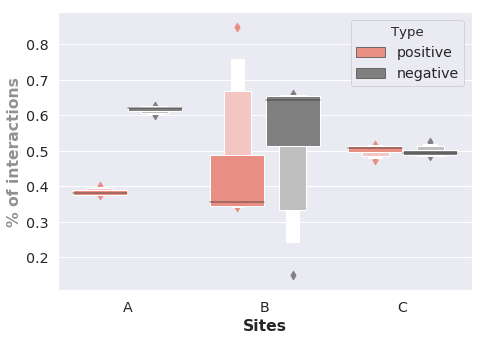

In [6]:
fig = plt.figure(figsize=(7,5))
sns.set(style='whitegrid')
sns.set(font_scale=1.3)
ax=sns.boxenplot(x="Site", y="Percentage", data=df, hue="Type",palette=my_pal,outlier_prop=0.8)
plt.ylabel("% of interactions", weight='bold', alpha=0.5)
plt.xlabel("Sites", weight="bold")
plt.tight_layout()
plt.savefig("../figures/Figure7_C.png",dpi=300)

## 2. Load data 

From the output of mfinder:

In [2]:
%%bash
less ../data/motifs/a_class_consensus.txt


   Summary motif results
mfinder Version 1.20

MOTIF FINDER RESULTS:

	Network name: FORMAT_MFINDER_a_class_consensus.txt
	Network type: Directed
	Num of Nodes: 91 Num of Edges: 7888
	Num of Nodes with edges: 91

The following motifs were found:

Criteria taken : Nreal Zscore > 2.00
                 Pval ignored (due to small number of random networks)
                 Mfactor > 1.10
                 Uniqueness >= 4



	Full list includes 0 motifs
MOTIF	NREAL	NRAND		NREAL	NREAL	UNIQ	CREAL
ID		STATS		ZSCORE	PVAL	VAL	[MILI]	




Full list of subgraphs size 3 ids:

	( Total num of different subgraphs size 3 is : 13 )

MOTIF	NREAL	NRAND		NREAL	NREAL	CREAL	UNIQ
ID		STATS		ZSCORE	PVAL	[MILI]	
6	52	52.0+-0.0	888888	1.000	0.43	1

12	6	6.0+-0.0	888888	1.000	0.05	1

14	3842	3842.0+-0.0	888888	1.000	31.99	2

36	0	0.0+-0.0	888888	1.000	0.00	0

38	30	30.0+-0.0	888888	1.000	0.25	1

46	2778	2778.0+-0.0	888888	1.000	23.13	5

74	0	0.0+-0.0	888888	1.000	0.00	0

78	0	0.0+-0.0	888888	1.000	0.00	0

98	0	0

### Parsing  outpout from MFINDER


```bash
#!/bin/bash
cd ../data/motifs/
for file  in *.txt; do grep -A  30 "Full list of subgraphs size 3 ids:" $file  | tail -n +5 | cut -f 1,2,5 | sed 's/ID//g' | sed 's/ZSCORE//g'| sed '/^\s*$/d'   | awk '$3<=0.05{print $0}'> $file.Pvalue.txt; done
mv *.Pvalue.txt ../../motifs_out/
cd ../data/motifs_out/
find  -size 0 -delete
tail -n +1  *.Pvalue.txt> toTable.motifs.txt
sed 's/==>//g' toTable.motifs.txt  | sed 's/_consensus.txt.Pvalue.txt <==//g' | sed 's/_/ /g' > toTable.motifs.toexcel.txt

```

In [11]:
%%bash
head ../data/motifs_out/toTable.motifs.toexcel.txt

 a family
12	8201	0.030

 a order
14	47660	0.000
38	12227	0.000
110	160069	0.010

 b family
38	49611	0.000


In [12]:
consensus=pd.read_table("../data/motifs_out/consensus.tab", index_col=0)
negatives=pd.read_table("../data/motifs_out/negative.tab", index_col=0)
positives=pd.read_table("../data/motifs_out/positives.tab", index_col=0)

FileNotFoundError: File b'../data/motifs_out/negative.tab' does not exist

## 3. Visualize dataframe 

In [7]:
consensus["74"]

NameError: name 'consensus' is not defined

In [10]:
consensus= consensus/consensus.sum()
positives= positives/positives.sum()
negatives= negatives/negatives.sum()
consensus

,6,12,14,36,38,46,74,78,98,102,108,110,238
Site_Level,,,,,,,,,,,,,
A_P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A_O,NaN,NaN,1.0,NaN,0.179782,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
A_F,NaN,0.180706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_O,NaN,0.005751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_F,NaN,NaN,NaN,NaN,0.729466,0.268821,0.271475,0.556191,NaN,NaN,NaN,NaN,NaN
C_P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


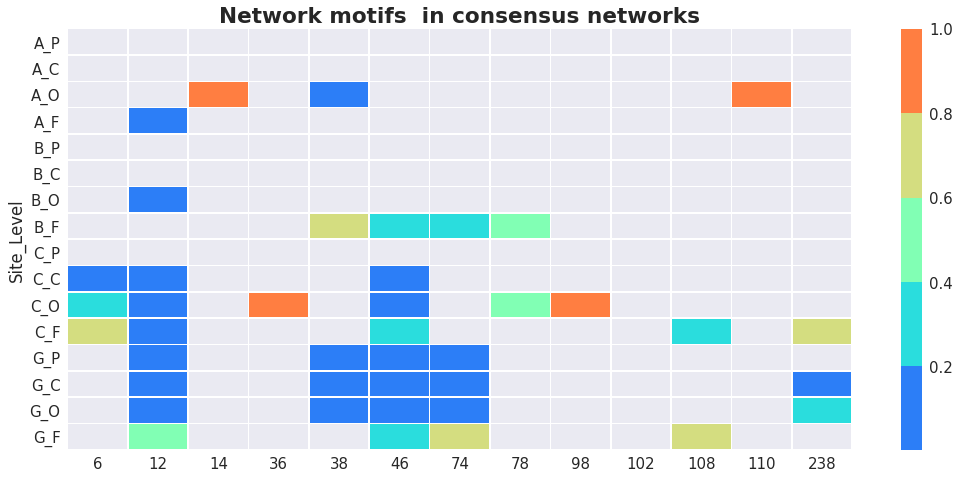

In [54]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(15,7))
ax=sns.heatmap(consensus,linewidths=0.6,cmap=sns.color_palette("rainbow", 5))
plt.title("Network motifs  in consensus networks", weight="bold", size="large")
#Old figure
#plt.xticks(rotation = 360)
#ax=sns.heatmap(consensus,linewidths=0.6,cmap=sns.color_palette("husl", 5))
#ax=consensus.plot(kind='bar',figsize=(12,5), colors=colors_)
#ax=sitea.T.plot(kind='bar',figsize=(12,4))#plt.ylim(0,5000000)
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
#plt.axvspan(5.5,6.5, alpha=0.1, color='salmon')
plt.tight_layout()
plt.savefig("../figures/Motifs_consensus.png",dpi=600,bbox_inches='tight')


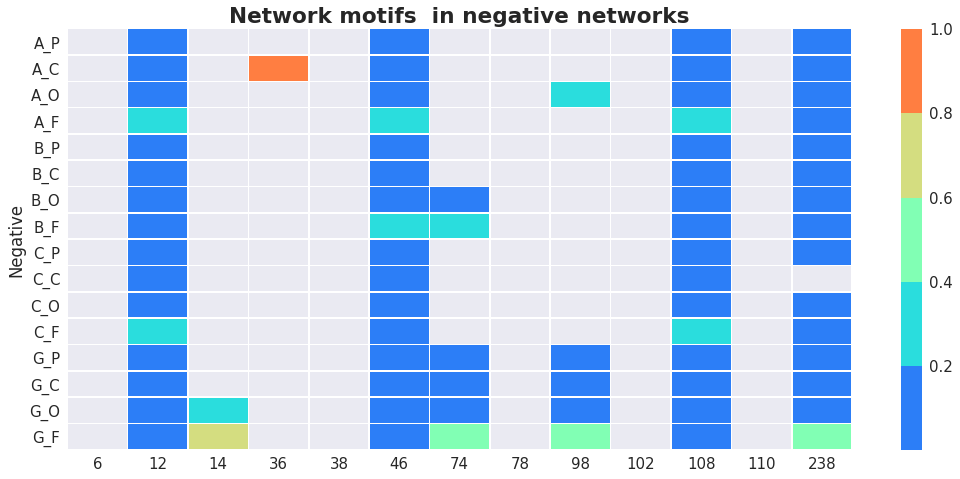

In [58]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(15,7))
ax=sns.heatmap(negatives,linewidths=0.6,cmap=sns.color_palette("rainbow", 5))
plt.title("Network motifs  in negative networks", weight="bold", size="large")
plt.tight_layout()
#plt.savefig("../figures/Motifs_negatives.png",dpi=600,bbox_inches='tight')

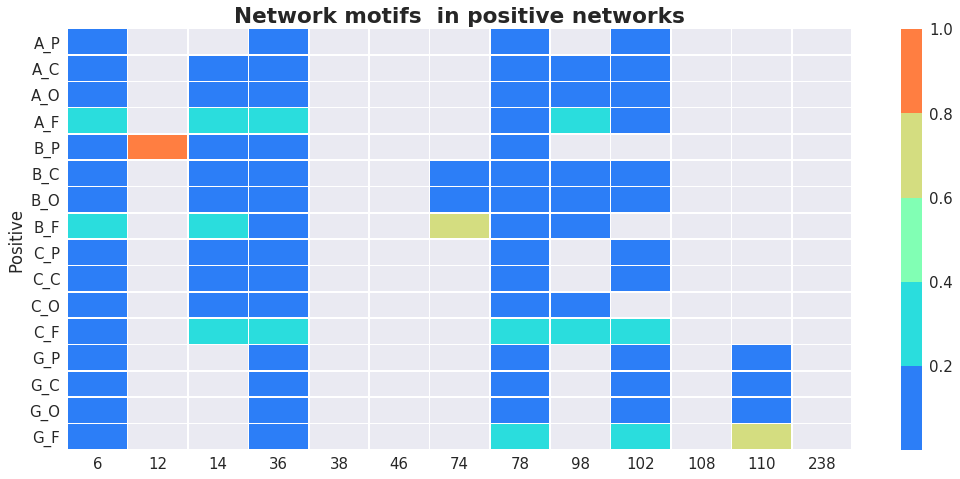

In [56]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(15,7))
ax=sns.heatmap(positives,linewidths=0.6,cmap=sns.color_palette("rainbow", 5))
plt.title("Network motifs  in positive networks", weight="bold", size="large")
plt.tight_layout()
plt.savefig("../figures/Motifs_positives.png",dpi=600,bbox_inches='tight')